# Import Needed Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data In

## Using Pandas read_csv to bring in the local CSV

In [2]:
book_data = pd.read_csv("best_book_21st.csv")

## Use columns() function to see what columns are included in the data and to see the exact spelling of the column.

In [3]:
book_data.columns

Index(['id', 'title', 'series', 'author', 'book_link', 'genre',
       'date_published', 'publisher', 'num_of_page', 'lang', 'review_count',
       'rating_count', 'rate', 'award'],
      dtype='object')

# Manipulate and Clean Data

## Start by dropping unneeded columns using the drop() function

## Then use the info() function to gather information and see what else is needed to clean the data

In [4]:
alt_book_data = book_data.drop(columns=['id', 'series', 'book_link', 'publisher', 'lang', 'award'])

alt_book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10018 entries, 0 to 10017
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           10018 non-null  object 
 1   author          10003 non-null  object 
 2   genre           9019 non-null   object 
 3   date_published  9970 non-null   object 
 4   num_of_page     9737 non-null   float64
 5   review_count    10003 non-null  object 
 6   rating_count    10003 non-null  object 
 7   rate            10003 non-null  float64
dtypes: float64(2), object(6)
memory usage: 626.2+ KB


## Use value_counts() function to find duplicate titles

In [5]:
alt_book_data['title'].value_counts()

Bloodlines (Bloodlines, #1)                                              4
The Shack                                                                3
The God Delusion                                                         3
Prey                                                                     3
Dominion                                                                 3
                                                                        ..
Shakespeare Saved My Life                                                1
The Power (The Secret, #2)                                               1
Henna House                                                              1
I Remember Running: The Year I Got Everything I Ever Wanted - and ALS    1
The Immortal Hunter (Argeneau #11; Rogue Hunter #2)                      1
Name: title, Length: 9098, dtype: int64

## Use drop_duplicates() function to drop any duplicate titles making sure to keep the first instance of each duplicate so that we don't lose any data

In [6]:
alt_book_data.drop_duplicates(subset='title', keep='first', inplace=True)

In [8]:
alt_book_data.isnull().sum()

title               0
author             15
genre             974
date_published     47
num_of_page       278
review_count       15
rating_count       15
rate               15
dtype: int64

In [9]:
alt_book_data.dropna(inplace=True)

In [11]:
alt_book_data.sample(5)

,title,author,genre,date_published,num_of_page,review_count,rating_count,rate
2131,The Buried Giant,Kazuo Ishiguro,"Fantasy,Fiction,Historical,Historical Fiction,...",March 2015,317.0,"10,651","84,985",3.54
9302,Harmony,"Project Itoh,Alexander O. Smith","Science Fiction,Science Fiction,Dystopia,Ficti...",July 20th 2010,252.0,165,"1,274",3.96
8017,The Gods of Greenwich,Norb Vonnegut,Fiction,April 26th 2011,322.0,46,297,3.51
3980,"The World at Large (Carpe Diem, #1)",Adam E. Mehaffey,Travel,December 31st 2014,280.0,14,93,4.12
5718,Den of Wolves (Empress of Rome #1),Luke Devenish,"Historical,Historical Fiction,Historical",2008,588.0,14,92,3.32


In [12]:
alt_book_data['genre']=alt_book_data['genre'].str.split(',').str[0]

alt_book_data.sample(10)

,title,author,genre,date_published,num_of_page,review_count,rating_count,rate
3398,"Break No Bones (Temperance Brennan, #9)",Kathy Reichs,Mystery,July 11th 2006,337.0,"1,061","29,565",3.97
394,Choke,Chuck Palahniuk,Fiction,June 2002,293.0,"6,302","199,885",3.70
3289,Two Brothers,Ben Elton,Historical,November 8th 2012,424.0,"1,086","11,114",4.36
4587,"Vendetta in Death (In Death, #49)",J.D. Robb,Mystery,September 3rd 2019,352.0,"1,537","17,458",4.35
7742,"Rot & Ruin (Rot & Ruin, #1)",Jonathan Maberry,Horror,September 14th 2010,458.0,"3,774","33,496",4.10
593,The Valley of Unknowing,Philip Sington,Historical,December 3rd 2012,298.0,59,334,3.83
10012,"The Great Good Thing (The Sylvie Cycle, #1)",Roderick Townley,Fantasy,September 1st 2003,224.0,329,"2,458",3.92
6174,"The Red Pole of Macau (Ava Lee, #4)",Ian Hamilton,Mystery,September 1st 2012,336.0,154,"1,347",3.92
2431,One Crazy Summer,Scott McElhaney,Mystery,",",133.0,20,161,3.80
2952,Horus Rising (Horus Heresy #1),Dan Abnett,Science Fiction,April 25th 2006,412.0,"1,080","18,456",4.20


In [13]:
alt_book_data.rename(columns = {'rate':'rating'}, inplace = True)
alt_book_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7960 entries, 0 to 10017
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           7960 non-null   object 
 1   author          7960 non-null   object 
 2   genre           7960 non-null   object 
 3   date_published  7960 non-null   object 
 4   num_of_page     7960 non-null   float64
 5   review_count    7960 non-null   object 
 6   rating_count    7960 non-null   object 
 7   rating          7960 non-null   float64
dtypes: float64(2), object(6)
memory usage: 559.7+ KB


In [14]:
alt_book_data['rating'].mean()

3.9643643216080404

In [15]:
alt_book_data.describe()

,num_of_page,rating
count,7960.000000,7960.000000
mean,362.088317,3.964364
std,196.666743,0.289561
min,0.000000,1.890000
25%,270.000000,3.780000
50%,338.000000,3.980000
75%,421.000000,4.160000
max,4167.000000,5.000000


What is the total number of pages in all of the books combined?

In [16]:
alt_book_data['num_of_page'].sum()

2882223.0

Sorting to show top 5 genres based on ratings.

In [17]:
top_genres = alt_book_data.groupby('genre')['rating'].mean().nlargest(5)

print(top_genres)

genre
Humanities       4.610
Urban            4.509
Inspirational    4.490
Classics         4.340
Labor            4.340
Name: rating, dtype: float64


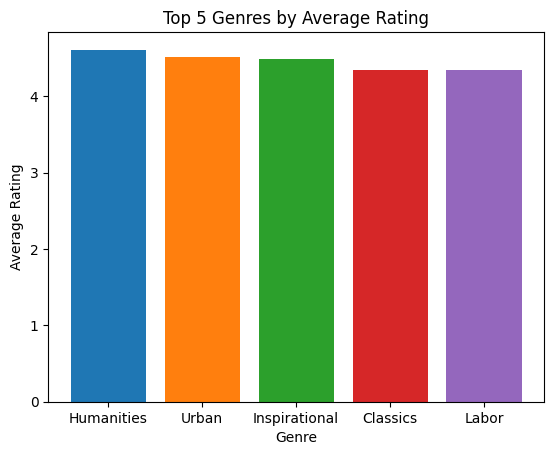

In [18]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
plt.bar(top_genres.index, top_genres.values, color=colors)
plt.title('Top 5 Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

Sorting to show top 5 books with the most number of pages.

In [19]:
top_titles = alt_book_data.nlargest(5, 'num_of_page')

print(top_titles[['title', 'num_of_page']])

                                                  title  num_of_page
5490           Harry Potter Boxset (Harry Potter, #1-7)       4167.0
2900  A Song of Ice and Fire (A Song of Ice and Fire...       4081.0
9202  The Dark Tower Series: Books 1-7 (The Dark Tow...       3914.0
7832       Harry Potter Collection (Harry Potter, #1-6)       3342.0
6124  The Collected Joe Abercrombie: The Blade Itsel...       3008.0


In [20]:
top_authors = alt_book_data.groupby('author')['title'].count().nlargest(5)

print(top_authors)

author
Lynsay Sands        26
Stephen King        21
Kelley Armstrong    20
Lucian Bane         20
Richelle Mead       20
Name: title, dtype: int64


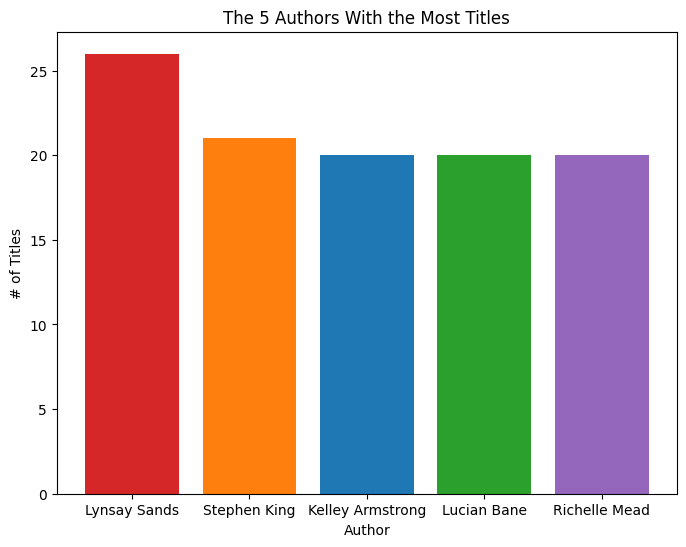

In [21]:
plt.figure(figsize=(8, 6))
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:purple']
plt.bar(top_authors.index, top_authors.values, color=colors)
plt.title('The 5 Authors With the Most Titles')
plt.xlabel('Author')
plt.ylabel('# of Titles')
plt.show()